<a href="https://colab.research.google.com/github/BKN1810/DeepLearning/blob/master/NepaliDigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install the dependencies
!pip install kaggle 

In [2]:
from google.colab import files
files.upload() # load kaggle.json file from your computer

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"balnyaupane","key":"f6b3948d7e76cad0d9405882ba27bb6a"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d balnyaupane/nepali-digit-28-by-28-images -p /content

 68% 5.00M/7.40M [00:01<00:00, 3.45MB/s]
100% 7.40M/7.40M [00:01<00:00, 4.95MB/s]


In [5]:
!unzip -uq "/content/nepali-digit-28-by-28-images.zip" -d "/content/Dataset"

In [6]:
from keras.models import Sequential
from keras.layers import Convolution2D, ZeroPadding2D ,BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout

Using TensorFlow backend.


In [7]:
classifier = Sequential()

#step1-convolution
classifier.add(Convolution2D(128,(3,3),input_shape=(28,28,1),activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D((2,2)))
classifier.add(Dropout(0.15))


#adding second Convolution layer
classifier.add(Convolution2D(256,(3,3),activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))

#adding third Convolution layer
classifier.add(Convolution2D(256,(3,3),activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D((2,2)))
classifier.add(Dropout(0.4))

#adding fourth Convolution layer
classifier.add(Convolution2D(512,(3,3),activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D((2,2)))
classifier.add(Dropout(0.4))


#step3-flattening
classifier.add(Flatten())

#step4-full connection
classifier.add(Dense(activation='relu',units=512))
classifier.add(Dropout(0.5))

classifier.add(Dense(activation='relu',units=512))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))


classifier.add(Dense(activation='relu',units=128))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))

classifier.add(Dense(activation='relu',units=128))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.25))

classifier.add(Dense(activation='softmax',units=10))

In [8]:
#compiling the cnn
classifier.compile(optimizer='adam' , loss='categorical_crossentropy',metrics=['accuracy'])

#part2- fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/Dataset/nepali_digit_28_by_28_images/train_set',
        target_size=(28, 28),
        batch_size=64,
        color_mode='grayscale',
        class_mode='categorical')

print("training_set.class_indices:   ",training_set.class_indices)

test_set = test_datagen.flow_from_directory('/content/Dataset/nepali_digit_28_by_28_images/test_set',
        target_size=(28, 28),
        batch_size=64,
        color_mode='grayscale',
        class_mode='categorical')

print("test_set.class_indices:   ",test_set.class_indices)

# summarize model.
classifier.summary()

Found 5820 images belonging to 10 classes.
training_set.class_indices:    {'digit_0': 0, 'digit_1': 1, 'digit_2': 2, 'digit_3': 3, 'digit_4': 4, 'digit_5': 5, 'digit_6': 6, 'digit_7': 7, 'digit_8': 8, 'digit_9': 9}
Found 3850 images belonging to 10 classes.
test_set.class_indices:    {'digit_0': 0, 'digit_1': 1, 'digit_2': 2, 'digit_3': 3, 'digit_4': 4, 'digit_5': 5, 'digit_6': 6, 'digit_7': 7, 'digit_8': 8, 'digit_9': 9}
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)     

In [9]:
History=classifier.fit_generator(training_set,
        steps_per_epoch=91,
        epochs=100,
        validation_data=test_set,
        validation_steps=61)

Epoch 1/100
91/91 [==============================] - 17s 182ms/step - loss: 2.5956 - accuracy: 0.1698 - val_loss: 2.2608 - val_accuracy: 0.1008
Epoch 2/100
91/91 [==============================] - 8s 90ms/step - loss: 1.9049 - accuracy: 0.3174 - val_loss: 2.1407 - val_accuracy: 0.1873
Epoch 3/100
91/91 [==============================] - 8s 90ms/step - loss: 1.5120 - accuracy: 0.4192 - val_loss: 2.1604 - val_accuracy: 0.1987
Epoch 4/100
91/91 [==============================] - 8s 91ms/step - loss: 1.1981 - accuracy: 0.5522 - val_loss: 1.6142 - val_accuracy: 0.3156
Epoch 5/100
91/91 [==============================] - 8s 90ms/step - loss: 0.9447 - accuracy: 0.6595 - val_loss: 0.7020 - val_accuracy: 0.5314
Epoch 6/100
91/91 [==============================] - 8s 91ms/step - loss: 0.7740 - accuracy: 0.7345 - val_loss: 0.9217 - val_accuracy: 0.6764
Epoch 7/100
91/91 [==============================] - 8s 90ms/step - loss: 0.6230 - accuracy: 0.7899 - val_loss: 0.6706 - val_accuracy: 0.7083
Epoc

In [10]:
# list all data in history
print(History.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


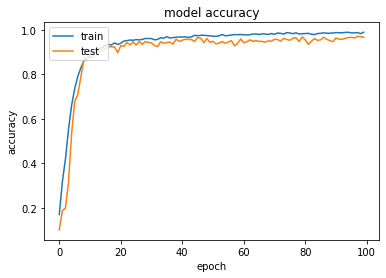

In [11]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

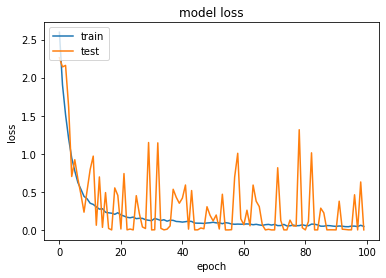

In [12]:
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
# Import dependencies
import json
from keras.models import model_from_json, load_model

# Save Weights + Architecture
classifier.save_weights('pneumoniaUsingCNN_weights.h5')
with open('pneumoniaUsingCNN_architecture.json', 'w') as f:
    f.write(classifier.to_json())

In [14]:
# Load Weights + Architecture
with open('pneumoniaUsingCNN_architecture.json', 'r') as f:
    loaded_model = model_from_json(f.read())
loaded_model.load_weights('pneumoniaUsingCNN_weights.h5')

In [19]:
#compiling the cnn
loaded_model.compile(optimizer='adam' , loss='categorical_crossentropy',metrics=['accuracy'])

loaded_model.evaluate_generator(training_set,steps=91,max_queue_size=10,workers=1,use_multiprocessing=False,verbose=0)
loaded_model.evaluate_generator(test_set,steps=91,max_queue_size=10,workers=1,use_multiprocessing=False,verbose=0)
print(loaded_model.metrics_names)


['loss', 'accuracy']


Confusion Matrix


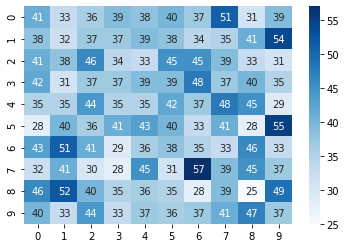

In [22]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
test_set.classes
Y_pred = loaded_model.predict_generator(test_set,steps=61)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cnf_matrix=confusion_matrix(test_set.classes, y_pred)
#print(confusion_matrix(test_set.classes, y_pred))

import seaborn as sns
#sns.heatmap(cnf_matrix, annot=True)
sns.heatmap(cnf_matrix, annot=True,cmap='Blues')